# **Step 8: Machine Learning (DL) Prototype** #

# **Loading Data** #

Data is already pre-processed and cleaned as part of the EDA : 
#remove urls
#remove numbers
#remove punctuation
#tokenization
#removing stop words
#Stemming
#Missing keywords have been removed

In [67]:
import os
import pandas as pd

In [68]:
# Loading data

dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
train_file = "train.csv"
train_file_path = os.path.join(dir,train_file)

train_df = pd.read_csv(train_file_path, encoding='utf-8')

In [69]:
# Data size
len(train_df)

7613

In [70]:
train_df.head()

,id,keyword,location,text,target,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,ablaze,"Philadelphia, PA","13,000 people receive #wildfires evacuation orders in California",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,ablaze,"London, UK",Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Pre-Processing Data** #

#### **1. Fixing Format on the training data: Removing carrier return in all columns.**  ####

In [71]:
train_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r", "\r"], value=["","",""], regex=True, inplace=True)
print(train_df.shape)

(7613, 14)


#### **2. Copy df into a file to clean data line by line.** ####

In [72]:
dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
train_file = "train_temp.csv"
train_file_path = os.path.join(dir,train_file)

train_df.to_csv(train_file_path, index = False, header = False)

#### **3. Formatting data to get all values into their corresponding columns** ####

In [73]:
import re
lst = []
dic = {}
count = 0


id_pattern = "^.+?,"                                #anything before the first comma
keyword_pattern = ",.*?,"                           #anything between the first and second comma.  It can be null
location_pattern_1 = ",\".+?\",{1}"                 #first quoted value between commas
location_pattern_2 = ",.*?,(.*?),"                  #grouping: second value between commas.  It can be null

with open (train_file_path, "r") as f:
    for line in f:
        # removing commas at the end of the row.
        line = line.strip("\n")
        line = line.strip(",")
        line = line.strip()        

        #Getting Id
        id_search = re.search(id_pattern, line)        
        id = id_search.group()[:-1]                
        
        #Getting keyword
        keyword_search = re.search(keyword_pattern,line)
        keyword = keyword_search.group()[1:-1]
        
        if re.search(location_pattern_1, line) != None:    
            #Getting location
            location_search = re.search(location_pattern_1, line)
            location = location_search.group()[1:-1]                        
            
        else:    
            #Getting location
            location_search = re.search(location_pattern_2, line)
            location = location_search.group(1)        
                    
        #Getting target                             #anything after the last comma
        target = line.rsplit(',',1)[1]
        
        #Getting text
        before_text = id + "," + keyword + "," + location + ","
        after_text = ","+target
        text = line.replace(before_text,"")         #removed id, keyword, loaction from the orininal string
        text = text.replace(after_text,"")          #removed target. Text is what is left - with commas, quotes, anything so we keep the text as complete as possible.
              
        #target = int(target)        

        #Getting data into a dataframe
        dic = {}
        dic["id"] = id
        dic["keyword"]=keyword
        dic["location"]= location
        dic["text"]=text
        dic["target"] = target
        lst.append(dic)
    
train_df = pd.DataFrame(lst)

In [74]:
train_df.head()

,id,keyword,location,text,target
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in California """,1
4,7,ablaze,"""London, UK""",Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


#### **4. Replacing %20 by space.** ####

In [ ]:
#replacing %20 by space.
#train_df["keyword"] = train_df["keyword"].str.replace("%20"," ")

#### **5. Cleaning target: Updating target to integer to remove 0.0** ####

In [75]:
train_df["target"].unique()

array(['1', '0', '0.0'], dtype=object)

In [76]:
train_df["target"] = train_df["target"].astype(float)
train_df["target"] = train_df["target"].astype(int)
train_df.head()

,id,keyword,location,text,target
0,1,ablaze,Birmingham,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,ablaze,Est. September 2012 - Bristol,Forest fire near La Ronge Sask. Canada,1
2,5,ablaze,AFRICA,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in California """,1
4,7,ablaze,"""London, UK""",Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [77]:
train_df["target"].unique()

array([1, 0])

# **Cleaning Data** #

#### **1. Text to lower case.** ####

In [78]:
train_df["text"] = train_df["text"].str.lower()
train_df["keyword"] = train_df["keyword"].str.lower()

#### **2. Getting hashtag from text.** ####

In [79]:
def get_hashtags(text):
    string = ""
    hashtag_pattern = r"(#[^ ]+)"
    hashtag = re.findall(hashtag_pattern,text)
    
    for element in hashtag:
        element = element.replace("#","")
        string += element + " "
        string = string.strip()
    
    return string


In [80]:
train_df["hashtags"] = train_df["text"].apply(lambda x : get_hashtags(x))
train_df.head()

,id,keyword,location,text,target,hashtags
0,1,ablaze,Birmingham,our deeds are the reason of this #earthquake may allah forgive us all,1,earthquake
1,4,ablaze,Est. September 2012 - Bristol,forest fire near la ronge sask. canada,1,
2,5,ablaze,AFRICA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in california """,1,wildfires
4,7,ablaze,"""London, UK""",just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,alaskawildfires


#### **3. Getting mentions from text.** There was no much meaning.  We're not going to use it. ####

In [81]:
#Users has no much meaning.  We're not going to use it.
testing_df = train_df

def get_mentions(text):
    string = ""
    mentions_pattern = r"(@[^ ]+)"
    mentions = re.findall(mentions_pattern,text)
    
    for element in mentions:
        element = element.replace("@","")
        string += element + " "
        string = string.strip()
    
    return string

testing_df["mentions"] = testing_df["text"].apply(lambda x : get_mentions(x))
testing_df.loc[testing_df["mentions"].str.len() > 0,:]

,id,keyword,location,text,target,hashtags,mentions
31,48,ablaze,Birmingham,@bbcmtd wholesale markets ablaze http://t.co/lhyxeohy6c,1,,bbcmtd
36,54,ablaze,Pretoria,@phdsquares #mufc they've built so much hype around new acquisitions but i doubt they will set the epl ablaze this season.,0,mufc,phdsquares
43,63,ablaze,,soooo pumped for ablaze ???? @southridgelife,0,,southridgelife
54,78,ablaze,Abuja,noches el-bestia '@alexis_sanchez: happy to see my teammates and training hard ?? goodnight gunners.?????? http://t.co/uc4j4jhvgr',0,,alexis_sanchez:
57,81,ablaze,"""Sao Paulo, Brazil""",set our hearts ablaze and every city was a gift and every skyline was like a kiss upon the lips @û_ https://t.co/cyompz1a0z,0,,û_
...,...,...,...,...,...,...,...
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... he's gone. you can relax. i thought the wife who wrecked her cake was a goner mind lol #whoops,0,whoops,widda16
7578,10830,wrecked,,@jt_ruff23 @cameronhacker and i wrecked you both,0,,jt_ruff23cameronhacker
7581,10833,wrecked,Lincoln,@engineshed great atmosphere at the british lion gig tonight. hearing is wrecked. http://t.co/omnbatjeao,0,,engineshed
7596,10851,,,rt @livingsafely: #nws issues severe #thunderstorm warnings for parts of #ar #nc #ok. expect more trauma cases: http://t.co/fwqfckncqw,1,nwsthunderstormarncok.,livingsafely:


#### **3. Removing emojis.** ####

In [83]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r" ", string)

In [84]:
train_df["text"] =  train_df["text"].map(lambda x: remove_emoji(x))

In [ ]:
#removing mentions?

#### **3. Cleaning text and keyword.** ####

In [85]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

pd.set_option("display.max_colwidth", None)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')

def cleaning(text):
    url_pattern = "http\S*"
    numb_word_pattern = "\d"
    html_pattern = "<.*?>"
    punctuation_pattern = string.punctuation
    
    #remove urls
    url_clean = re.sub(url_pattern," ",text)
    
    #remove html code  <pending testing>
    html_clean = re.sub(html_pattern," ", url_clean)    
       
    #remove numbers
    numbers_clean = re.sub(numb_word_pattern," ",html_clean)
    
    #remove punctuation
    punctuation_clean = re.sub("[{}]".format(punctuation_pattern)," ",numbers_clean)
    
    #tokenization
    tokens = word_tokenize(punctuation_clean)
    
    #removing stop words
    stop_words = stopwords.words('english')
    stop_words_clean = [word.strip() for word in tokens if word.strip() not in stop_words]
    
    #Stemming
    stemmer = nltk.stem.PorterStemmer()
    stemmer_clean = [stemmer.stem(word) for word in stop_words_clean]
    stemmer_clean_str = " ".join(stemmer_clean)
    
    #lemmatimize?????  <pending>
        
    return stemmer_clean_str

[nltk_data] Downloading package punkt to /home/erika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/erika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index


In [86]:
train_df["clean_text"] = train_df["text"].apply(lambda x: cleaning(x))

In [87]:
train_df.head()

,id,keyword,location,text,target,hashtags,mentions,clean_text
0,1,ablaze,Birmingham,our deeds are the reason of this #earthquake may allah forgive us all,1,earthquake,,deed reason earthquak may allah forgiv us
1,4,ablaze,Est. September 2012 - Bristol,forest fire near la ronge sask. canada,1,,,forest fire near la rong sask canada
2,5,ablaze,AFRICA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,,,resid ask shelter place notifi offic evacu shelter place order expect
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in california """,1,wildfires,,peopl receiv wildfir evacu order california
4,7,ablaze,"""London, UK""",just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,alaskawildfires,,got sent photo rubi alaska smoke wildfir pour school


In [88]:
train_df["clean_keyword"] = train_df["keyword"].apply(lambda x: cleaning(x))

In [89]:
train_df.head()

,id,keyword,location,text,target,hashtags,mentions,clean_text,clean_keyword
0,1,ablaze,Birmingham,our deeds are the reason of this #earthquake may allah forgive us all,1,earthquake,,deed reason earthquak may allah forgiv us,ablaz
1,4,ablaze,Est. September 2012 - Bristol,forest fire near la ronge sask. canada,1,,,forest fire near la rong sask canada,ablaz
2,5,ablaze,AFRICA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,,,resid ask shelter place notifi offic evacu shelter place order expect,ablaz
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in california """,1,wildfires,,peopl receiv wildfir evacu order california,ablaz
4,7,ablaze,"""London, UK""",just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,alaskawildfires,,got sent photo rubi alaska smoke wildfir pour school,ablaz


#### **4. Missing data.** ####

In [90]:
# Checking nulls
train_df.isnull().sum()

id               0
keyword          0
location         0
text             0
target           0
hashtags         0
mentions         0
clean_text       0
clean_keyword    0
dtype: int64

In [91]:
# Checking blanks
import numpy as np
train_df = train_df.replace(r"^\s*$", np.nan, regex=True)

In [92]:
#train_df.isnull().sum()
print(train_df.isnull().sum())
print(len(train_df))

id                  0
keyword            30
location         2506
text                0
target              0
hashtags         5856
mentions         5596
clean_text          0
clean_keyword      30
dtype: int64
7613


In [93]:
train_df["hashtags"].unique()

array(['earthquake', nan, 'wildfires', ..., 'nwsthunderstormarncok.',
       'bathandnortheastsomerset', 'breakingla'], dtype=object)

<AxesSubplot:>

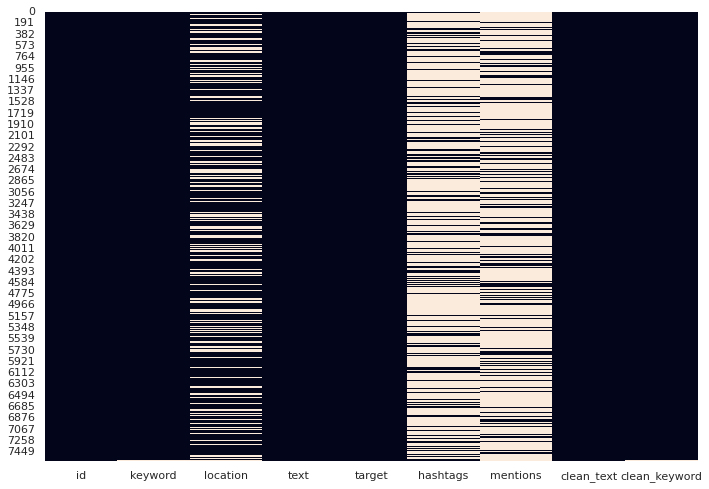

In [94]:
#Plotting missing counts

import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(train_df.isnull(), cbar=False)

In [95]:
# Checking keywords blank counts
train_df.loc[train_df["clean_keyword"].isnull(),:]

,id,keyword,location,text,target,hashtags,mentions,clean_text,clean_keyword
7583,10835,NaN,NaN,pic of 16yr old pkk suicide bomber who detonated bomb in turkey army trench released http://t.co/aawzxykles http://t.co/rsmvgdxriv,1,NaN,NaN,pic yr old pkk suicid bomber deton bomb turkey armi trench releas,NaN
7584,10837,NaN,NaN,these boxes are ready to explode! exploding kittens finally arrived! gameofkittens #explodingkittensû_ https://t.co/tfgrayudc5,0,explodingkittensû_,NaN,box readi explod explod kitten final arriv gameofkitten explodingkittensû,NaN
7585,10839,NaN,NaN,calgary police flood road closures in calgary. http://t.co/rln09wke9g,1,NaN,NaN,calgari polic flood road closur calgari,NaN
7586,10840,NaN,NaN,#sismo detectado #japì_n 15:41:07 seismic intensity 0 iwate miyagi jst #?? http://t.co/gmoul9zq2q,1,sismojapì_n??,NaN,sismo detectado japì n seismic intens iwat miyagi jst,NaN
7587,10841,NaN,NaN,sirens everywhere!,0,NaN,NaN,siren everywher,NaN
7588,10842,NaN,NaN,breaking: #isis claims responsibility for mosque attack in saudi arabia that killed 13 http://t.co/vz640xoswj http://t.co/m2hpnoak8b,1,isis,NaN,break isi claim respons mosqu attack saudi arabia kill,NaN
7589,10843,NaN,NaN,omg earthquake,1,NaN,NaN,omg earthquak,NaN
7590,10844,NaN,NaN,severe weather bulletin no. 5 for: typhoon ûï#hannaphû (soudelor) tropical cyclone: warning issued at 5:00 pm 06... http://t.co/thhjjw51pe û_,1,hannaphû,NaN,sever weather bulletin typhoon ûï hannaphû soudelor tropic cyclon warn issu pm û,NaN
7591,10846,NaN,NaN,heat wave warning aa? ayyo dei. just when i plan to visit friends after a year.,1,NaN,NaN,heat wave warn aa ayyo dei plan visit friend year,NaN
7592,10847,NaN,NaN,an is group suicide bomber detonated an explosives-packed vest in a mosque inside a saudi special forces headquarters killing 15 people.,1,NaN,NaN,group suicid bomber deton explos pack vest mosqu insid saudi special forc headquart kill peopl,NaN


In [96]:
#Remove the 30 records with blank keyword from training dataset
len(train_df)

7613

In [97]:
train_df.dropna(subset=["clean_keyword"], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7583 entries, 0 to 7582
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             7583 non-null   object
 1   keyword        7583 non-null   object
 2   location       5107 non-null   object
 3   text           7583 non-null   object
 4   target         7583 non-null   int64 
 5   hashtags       1745 non-null   object
 6   mentions       2015 non-null   object
 7   clean_text     7583 non-null   object
 8   clean_keyword  7583 non-null   object
dtypes: int64(1), object(8)
memory usage: 592.4+ KB


#### **5. Text + Keyword.** ####

In [100]:
train_df["keyword_text"] = train_df["clean_keyword"]+" "+train_df["clean_text"]

In [106]:
train_df.head()

,id,keyword,location,text,target,hashtags,mentions,clean_text,clean_keyword,keyword_text
0,1,ablaze,Birmingham,our deeds are the reason of this #earthquake may allah forgive us all,1,earthquake,NaN,deed reason earthquak may allah forgiv us,ablaz,ablaz deed reason earthquak may allah forgiv us
1,4,ablaze,Est. September 2012 - Bristol,forest fire near la ronge sask. canada,1,NaN,NaN,forest fire near la rong sask canada,ablaz,ablaz forest fire near la rong sask canada
2,5,ablaze,AFRICA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,NaN,NaN,resid ask shelter place notifi offic evacu shelter place order expect,ablaz,ablaz resid ask shelter place notifi offic evacu shelter place order expect
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in california """,1,wildfires,NaN,peopl receiv wildfir evacu order california,ablaz,ablaz peopl receiv wildfir evacu order california
4,7,ablaze,"""London, UK""",just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,alaskawildfires,NaN,got sent photo rubi alaska smoke wildfir pour school,ablaz,ablaz got sent photo rubi alaska smoke wildfir pour school


In [109]:
#csv
dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
train_file = "data1.csv"
data_file = os.path.join(dir,train_file)

train_df[["keyword_text"]].to_csv(data_file)

In [110]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [134]:
import re

#hex_pattern = r'[^ -~].*'

def cleaning_hex(text):
    clean_hex = re.sub(r'[^ -~].*'.format(string.punctuation)," ", text)
    return clean_hex
    
#text = "aftershock ir icemoon aftershock djicemoon dubstep trapmus dnb edm danc icesû"
#matches = re.findall(r"C2 89 ([0-9A-F]{2} [0-9A-F]{2} [0-9A-F]{2})", text)

#print(matches)
#print(matches.groups)
#clean_hex = cleaning_hex(text)
#print(clean_hex)
    
# html_clean = re.sub(html_pattern," ", url_clean) 
# s = input("enter the string ")
# m = re.findall(r'[0-9a-fA-F]+' , s)
# print("Hexadecimal numbers in given string is s ",*m)
train_df["clean_hex"] = train_df["keyword_text"].apply(lambda x: cleaning_hex(x))

In [130]:
s = 'https://google.com<0xC2><0x89>'
print(s)
s=re.sub(r'[^ -~].*'.format(string.punctuation), '',s)
print(s)

https://google.com<0xC2><0x89>
https://google.com<0xC2><0x89>


In [133]:
print(r'[^ -~].*'.format(string.punctuation))

[^ -~].*


In [115]:
train_df.head()

,id,keyword,location,text,target,hashtags,mentions,clean_text,clean_keyword,keyword_text,clean_hex
0,1,ablaze,Birmingham,our deeds are the reason of this #earthquake may allah forgive us all,1,earthquake,NaN,deed reason earthquak may allah forgiv us,ablaz,ablaz deed reason earthquak may allah forgiv us,ablaz deed reason earthquak may allah forgiv us
1,4,ablaze,Est. September 2012 - Bristol,forest fire near la ronge sask. canada,1,NaN,NaN,forest fire near la rong sask canada,ablaz,ablaz forest fire near la rong sask canada,ablaz forest fire near la rong sask canada
2,5,ablaze,AFRICA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,NaN,NaN,resid ask shelter place notifi offic evacu shelter place order expect,ablaz,ablaz resid ask shelter place notifi offic evacu shelter place order expect,ablaz resid ask shelter place notifi offic evacu shelter place order expect
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in california """,1,wildfires,NaN,peopl receiv wildfir evacu order california,ablaz,ablaz peopl receiv wildfir evacu order california,ablaz peopl receiv wildfir evacu order california
4,7,ablaze,"""London, UK""",just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,alaskawildfires,NaN,got sent photo rubi alaska smoke wildfir pour school,ablaz,ablaz got sent photo rubi alaska smoke wildfir pour school,ablaz got sent photo rubi alaska smoke wildfir pour school


In [135]:
#csv
dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
train_file = "data3.csv"
data_file = os.path.join(dir,train_file)

train_df[["clean_hex"]].to_csv(data_file)

# **Visualizing Data** #

#### **1. Most common words on emergency tweets.** ####

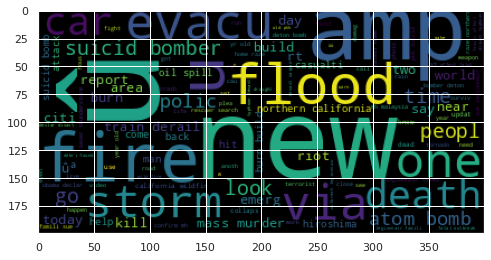

In [102]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

emerg_df = train_df.loc[train_df["target"]==1,:]["clean_text"]
disaster_text_str = " ".join(emerg_df)
wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

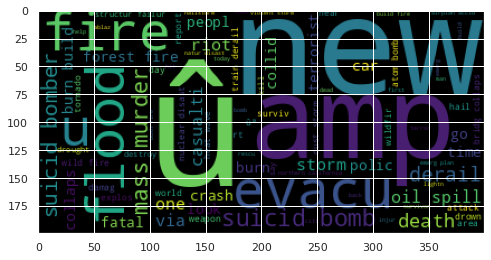

In [103]:
emerg_df = train_df.loc[train_df["target"]==1,:]["keyword_text"]
disaster_text_str = " ".join(emerg_df)

wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

#### **2. Most common words on non-emergency tweets.** ####

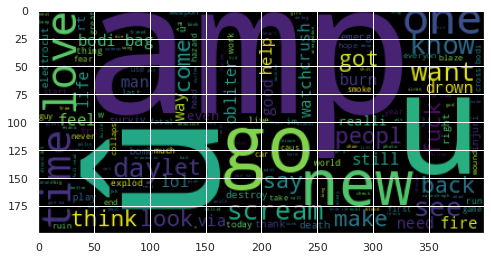

In [104]:
emerg_df = train_df.loc[train_df["target"]==0,:]["clean_text"]
disaster_text_str = " ".join(emerg_df)
wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

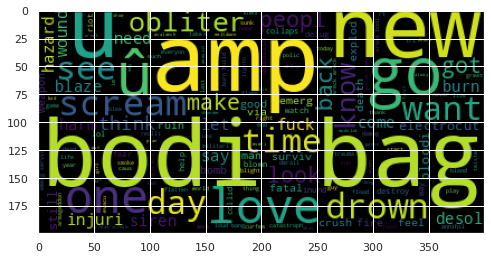

In [136]:
emerg_df = train_df.loc[train_df["target"]==0,:]["keyword_text"]
disaster_text_str = " ".join(emerg_df)

wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

# **Removing the U hex** #

In [137]:
import re

def cleaning_hex(text):
    clean_hex = re.sub(r'[^ -~].*'.format(string.punctuation)," ", text)
    return clean_hex
    
train_df["clean_hex"] = train_df["keyword_text"].apply(lambda x: cleaning_hex(x))

In [138]:
train_df.head()

,id,keyword,location,text,target,hashtags,mentions,clean_text,clean_keyword,keyword_text,clean_hex
0,1,ablaze,Birmingham,our deeds are the reason of this #earthquake may allah forgive us all,1,earthquake,NaN,deed reason earthquak may allah forgiv us,ablaz,ablaz deed reason earthquak may allah forgiv us,ablaz deed reason earthquak may allah forgiv us
1,4,ablaze,Est. September 2012 - Bristol,forest fire near la ronge sask. canada,1,NaN,NaN,forest fire near la rong sask canada,ablaz,ablaz forest fire near la rong sask canada,ablaz forest fire near la rong sask canada
2,5,ablaze,AFRICA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,NaN,NaN,resid ask shelter place notifi offic evacu shelter place order expect,ablaz,ablaz resid ask shelter place notifi offic evacu shelter place order expect,ablaz resid ask shelter place notifi offic evacu shelter place order expect
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in california """,1,wildfires,NaN,peopl receiv wildfir evacu order california,ablaz,ablaz peopl receiv wildfir evacu order california,ablaz peopl receiv wildfir evacu order california
4,7,ablaze,"""London, UK""",just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,alaskawildfires,NaN,got sent photo rubi alaska smoke wildfir pour school,ablaz,ablaz got sent photo rubi alaska smoke wildfir pour school,ablaz got sent photo rubi alaska smoke wildfir pour school


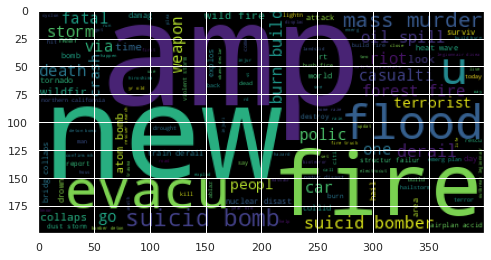

In [140]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

emerg_df = train_df.loc[train_df["target"]==1,:]["clean_hex"]
disaster_text_str = " ".join(emerg_df)
wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

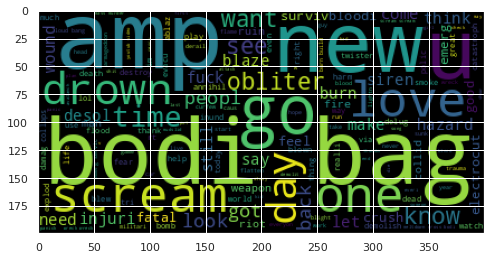

In [141]:
emerg_df = train_df.loc[train_df["target"]==0,:]["clean_hex"]
disaster_text_str = " ".join(emerg_df)
wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

# **Removing the amp that was left from &amp** #

In [143]:
def cleaning_amp(text):
    clean = re.sub(r'\samp\s'," ", text)
    return clean
    
train_df["clean_data"] = train_df["clean_hex"].apply(lambda x: cleaning_amp(x))

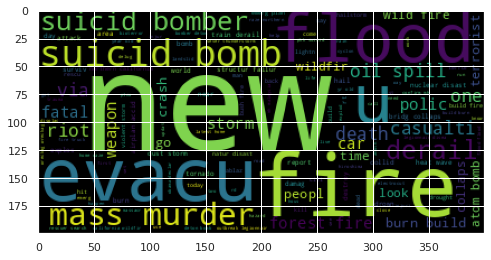

In [145]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

emerg_df = train_df.loc[train_df["target"]==1,:]["clean_data"]
disaster_text_str = " ".join(emerg_df)
wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

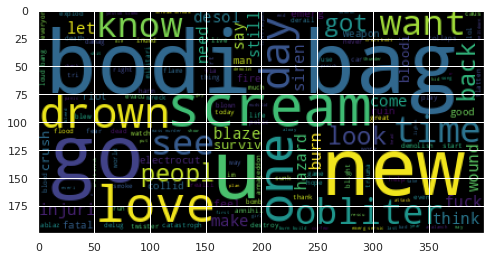

In [146]:
emerg_df = train_df.loc[train_df["target"]==0,:]["clean_data"]
disaster_text_str = " ".join(emerg_df)
wordcloud = WordCloud().generate(disaster_text_str)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud)
plt.show()

In [147]:
#U refers to you.  I'll leave it by now.

In [148]:
train_df.head()

,id,keyword,location,text,target,hashtags,mentions,clean_text,clean_keyword,keyword_text,clean_hex,clean_data
0,1,ablaze,Birmingham,our deeds are the reason of this #earthquake may allah forgive us all,1,earthquake,NaN,deed reason earthquak may allah forgiv us,ablaz,ablaz deed reason earthquak may allah forgiv us,ablaz deed reason earthquak may allah forgiv us,ablaz deed reason earthquak may allah forgiv us
1,4,ablaze,Est. September 2012 - Bristol,forest fire near la ronge sask. canada,1,NaN,NaN,forest fire near la rong sask canada,ablaz,ablaz forest fire near la rong sask canada,ablaz forest fire near la rong sask canada,ablaz forest fire near la rong sask canada
2,5,ablaze,AFRICA,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,NaN,NaN,resid ask shelter place notifi offic evacu shelter place order expect,ablaz,ablaz resid ask shelter place notifi offic evacu shelter place order expect,ablaz resid ask shelter place notifi offic evacu shelter place order expect,ablaz resid ask shelter place notifi offic evacu shelter place order expect
3,6,ablaze,"""Philadelphia, PA""","""13,000 people receive #wildfires evacuation orders in california """,1,wildfires,NaN,peopl receiv wildfir evacu order california,ablaz,ablaz peopl receiv wildfir evacu order california,ablaz peopl receiv wildfir evacu order california,ablaz peopl receiv wildfir evacu order california
4,7,ablaze,"""London, UK""",just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,alaskawildfires,NaN,got sent photo rubi alaska smoke wildfir pour school,ablaz,ablaz got sent photo rubi alaska smoke wildfir pour school,ablaz got sent photo rubi alaska smoke wildfir pour school,ablaz got sent photo rubi alaska smoke wildfir pour school


In [150]:
data_df = train_df[["clean_data","target"]]

In [153]:
data_df.rename(columns={"clean_data":"text"}, inplace=True)

/tmp/ipykernel_5485/4043707800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.rename(columns={"clean_data":"text"}, inplace=True)


In [154]:
data_df.head()

,text,target
0,ablaz deed reason earthquak may allah forgiv us,1
1,ablaz forest fire near la rong sask canada,1
2,ablaz resid ask shelter place notifi offic evacu shelter place order expect,1
3,ablaz peopl receiv wildfir evacu order california,1
4,ablaz got sent photo rubi alaska smoke wildfir pour school,1


# **Saving to a csv file** #

In [155]:
#csv
dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
train_file = "clean_data.csv"
data_file = os.path.join(dir,train_file)

data_df.to_csv(data_file)

In [156]:
len(data_df)

7583

# **Model** #

## **Reading data** ##

In [33]:
import pandas as pd
import os

dir = "/home/erika/UCSD/UCSD/capstone/NLP_with_Disaster_Tweets/data/tweeter_disaster_text_analysis"
train_file = "clean_data.csv"
data_file = os.path.join(dir,train_file)

data = pd.read_csv(data_file, index_col = False)
data = data[["text","target"]]

In [34]:
data.head()

,text,target
0,ablaz deed reason earthquak may allah forgiv us,1
1,ablaz forest fire near la rong sask canada,1
2,ablaz resid ask shelter place notifi offic eva...,1
3,ablaz peopl receiv wildfir evacu order california,1
4,ablaz got sent photo rubi alaska smoke wildfir...,1


## **Splitting data ( train, validation and test )** ##

In [35]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data, target = 'target',train_size=0.8, valid_size=0.1, test_size=0.1,
                                                                           method = "random", random_state = 17)

print("Training dataset size: {} , {}".format(X_train.shape,y_train.shape))
print("Validation dataset size: {} , {}".format(X_valid.shape,y_valid.shape))
print("Testing dataset size: {} , {}".format(X_test.shape,y_test.shape))

Training dataset size: (6066, 1) , (6066,)
Validation dataset size: (758, 1) , (758,)
Testing dataset size: (759, 1) , (759,)


## **Encoding and Padding.** ##

In [36]:
# Word frequency in whole data.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data["text"])
vocab_size = len(cv.vocabulary_)

print("Vocabulary size (Whole corpus): {}".format(vocab_size))

Vocabulary size (Whole corpus): 13003


In [37]:
# Encoding Training data only

from keras.preprocessing.text import Tokenizer

num_words = vocab_size + 1
tokenizer = Tokenizer(num_words=num_words, oov_token = True)
tokenizer.fit_on_texts(X_train["text"])


#### **Checking number of words distribution on training data** ####

(array([ 253.,  521.,  866., 1686., 1097.,  968.,  576.,   81.,   10.,
           8.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

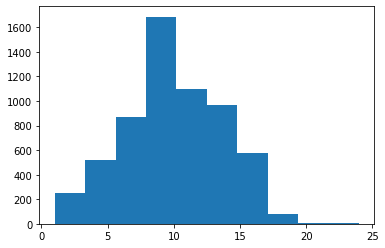

In [38]:
# Max # of words per record
from matplotlib import pyplot as plt

seq_length = []
for i in X_train["text"]:  
    seq_length.append(len(i.split()))     

plt.hist(seq_length)

In [39]:
max_length = 20

#### **Training - Text to sequence and Padding.** ####

In [40]:
from keras_preprocessing.sequence import pad_sequences

X_train_sequences = tokenizer.texts_to_sequences(X_train["text"])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding="post", truncating="post")

#### **Validation - Text to sequence and Padding.** ####

In [41]:
X_valid_sequences = tokenizer.texts_to_sequences(X_valid["text"])
X_valid_padded = pad_sequences(X_valid_sequences, maxlen=max_length, padding="post", truncating="post")

#### **Test - Text to sequence and Padding.** ####

In [42]:
X_test_sequences = tokenizer.texts_to_sequences(X_test["text"])
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding="post", truncating="post")

## **Decoding.** ##

In [43]:
word_index = tokenizer.word_index
word_index

{True: 1,
 'fire': 2,
 'bomb': 3,
 'like': 4,
 'burn': 5,
 'emerg': 6,
 'get': 7,
 'build': 8,
 'flood': 9,
 'disast': 10,
 'bodi': 11,
 'fatal': 12,
 'crash': 13,
 'derail': 14,
 'storm': 15,
 'evacu': 16,
 'attack': 17,
 'via': 18,
 'new': 19,
 'collaps': 20,
 'one': 21,
 'scream': 22,
 'suicid': 23,
 'peopl': 24,
 'bag': 25,
 'drown': 26,
 'go': 27,
 'hijack': 28,
 'news': 29,
 'weapon': 30,
 'time': 31,
 'polic': 32,
 'obliter': 33,
 'accid': 34,
 'kill': 35,
 'year': 36,
 'death': 37,
 'video': 38,
 'wreck': 39,
 'destroy': 40,
 'nuclear': 41,
 'wound': 42,
 'murder': 43,
 'explod': 44,
 'casualti': 45,
 'deton': 46,
 'surviv': 47,
 'hazard': 48,
 'day': 49,
 'riot': 50,
 'devast': 51,
 'crush': 52,
 'love': 53,
 'say': 54,
 'quarantin': 55,
 'look': 56,
 'mass': 57,
 'injuri': 58,
 'collid': 59,
 'us': 60,
 'fear': 61,
 'hostag': 62,
 'see': 63,
 'bioterror': 64,
 'would': 65,
 'electrocut': 66,
 'home': 67,
 'plan': 68,
 'rescu': 69,
 'siren': 70,
 'come': 71,
 'famili': 72,
 'g

In [44]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [45]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "na") for i in text])

In [ ]:
#First row example

In [46]:
X_train["text"].head(1)

1992    damag writebothfist got pretti windi damag
Name: text, dtype: object

In [47]:
X_train_sequences[0]

[88, 4560, 73, 677, 3150, 88]

In [48]:
decode(X_train_sequences[0])

'damag writebothfist got pretti windi damag'

## **Keras** ##

In [51]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim=32, input_length=max_length))
model.add(LSTM(64, dropout=0.1))
model.add(Dense(1, activation="sigmoid"))

optimizer = Adam(learning_rate=3e-4)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [52]:
history = model.fit(
    X_train_padded, y_train, epochs=20, validation_data=(X_valid_padded, y_valid),
)

Epoch 1/20
190/190 [==============================] - 3s 9ms/step - loss: 0.6324 - accuracy: 0.6189 - val_loss: 0.4740 - val_accuracy: 0.7691
Epoch 2/20
190/190 [==============================] - 1s 8ms/step - loss: 0.4024 - accuracy: 0.8269 - val_loss: 0.4553 - val_accuracy: 0.8061
Epoch 3/20
190/190 [==============================] - 1s 8ms/step - loss: 0.2943 - accuracy: 0.8815 - val_loss: 0.5014 - val_accuracy: 0.7916
Epoch 4/20
190/190 [==============================] - 1s 8ms/step - loss: 0.2104 - accuracy: 0.9217 - val_loss: 0.5408 - val_accuracy: 0.7823
Epoch 5/20
190/190 [==============================] - 1s 8ms/step - loss: 0.1520 - accuracy: 0.9487 - val_loss: 0.7185 - val_accuracy: 0.7744
Epoch 6/20
190/190 [==============================] - 1s 8ms/step - loss: 0.1220 - accuracy: 0.9581 - val_loss: 0.6751 - val_accuracy: 0.7744
Epoch 7/20
190/190 [==============================] - 2s 8ms/step - loss: 0.1001 - accuracy: 0.9675 - val_loss: 0.7175 - val_accuracy: 0.7546
Epoch 

## **Prediction** ##

In [53]:
model.predict(X_test_padded)

24/24 [==============================] - 0s 2ms/step


array([[3.00940778e-03],
       [9.99854684e-01],
       [8.92158947e-04],
       [6.55367672e-02],
       [1.22774474e-03],
       [8.29958260e-01],
       [9.14924894e-04],
       [9.10374701e-01],
       [9.98754501e-01],
       [7.16119409e-01],
       [9.99845505e-01],
       [1.59105402e-03],
       [9.99138236e-01],
       [9.99578416e-01],
       [8.93477118e-04],
       [9.99755263e-01],
       [9.99617457e-01],
       [9.40594912e-01],
       [5.24805009e-01],
       [8.68865114e-04],
       [4.11747783e-01],
       [8.59517872e-01],
       [5.93083585e-03],
       [2.53361374e-01],
       [1.64618215e-03],
       [1.97002734e-03],
       [8.38742708e-04],
       [1.81799307e-01],
       [9.99807954e-01],
       [9.99834359e-01],
       [9.99866188e-01],
       [7.51307118e-04],
       [9.64135945e-01],
       [5.08029526e-03],
       [9.99815106e-01],
       [9.87112463e-01],
       [1.89280149e-03],
       [5.22708613e-03],
       [5.04991263e-02],
       [8.16019177e-01],


## **Evaluation** ##

In [55]:
loss, accuracy = model.evaluate(X_test_padded,y_test,verbose = 0)

In [57]:
print("loss = {} ; accuracy = {}".format(loss, accuracy))

loss = 1.1484801769256592 ; accuracy = 0.7444005012512207
